# Reinforcement Learning

## Importing packages

We import several familiar libraries like numpy and random.

We also provide you an implementation of an MDP in MDP_FrozenLake.py and with a way to visualize your learning and your environments in vis_ex1ab.py.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
  
from FrozenLake import FrozenLakeEnv

plt.rcParams.update({'figure.max_open_warning': 0})

# Dynamic Programming

## The MDP

The problem is provided by the Berkeley Deep RL Course Homeworks: https://github.com/berkeleydeeprlcourse/homework

The task is to reach the goal state <b>G</b>, starting from initial state <b>S</b>, without falling into Hole <b>H</b> and die miserably. That, means we have to reach the goal traversing the <b>F</b>  tiles. Remember that in the Frozenworld Problem the ground is slippery, meaning if you move right, you can also move upward or downward as well (the transition model is non-deterministic).

The map of the MDP is the following:

        S F F F
        F H F H
        F F F H
        H F F G
        
The possible actions are the following:

        LEFT = 0
        DOWN = 1
        RIGHT = 2
        UP = 3

## Value Iteration

The basis for every decision making process is to measure, if the state $s$ following an action $a$ is good or not. If we know the transition model and reward function of the MDP, we can achieve this by estimating the <b>optimal</b> State-Value Function $V$, assigning a value to each state $s$. 

We can approximate the optimal value function using Dynamic Programming. Dynamic programming is tabular approach, which saves a value for each state. This table is created in __\_\_init\_\___ using numpy. Note that it is a good practice to initialize with $V(s) = 0$ for all states. 

We calculate the values using the bellman optimality equation. The adaption for the <b>Value Iteration</b> approach from lecture one is as follows: 

$V \left( s \right) = \underset{a \in \mathcal{A}}{max} \underset{ s' \in \mathcal{S}, r}{\sum}  \mathcal{P}\left( s' , r | s, a \right) \left[ r + \gamma V \left( s' \right) \right]  $


As you probably can imagine, $V$ should be updated accordingly in \_\_value_iteration\_\_ using the formula above. However, one update won't converge to the actual values. This means, we have to iterate all states, multiple times, until the values are sufficiently accurate. Basically, you have to implement the evaluation part of the algorithm from lecture one in this function. 

<b>ATTENTION</b>: An importan aspect to consider is that special care needs to be taken when we are at a terminal state (e.g., in the Goal <b>G</b> or Hole <b>H</b> states of the Frozen Lake MDP). Here, no matter what action we execute, we cannot "escape" this state, so the Value Iteration implementation should be adapted accordingly.

## The Value Iteration Agent

In [3]:
class DP_Agent:
    def __init__(self, discount_factor):
        self.g      = discount_factor
        self.MDP = FrozenLakeEnv()
        self.MDP.seed(0)
        self.terminals = [5,7,11,12,15]
        # MDP.p_a: uniform action probability (25% chance an action is selected)
        # MDP.p_s_: uniform next-state probability
        # MDP.P_ss_(s,a): set of all possible states when taking action a in state s
        # MDP.R(s): reward in state s
        # MDP.A: set of all possible actions,e.g. full action space
        # MDP.S_(s,a): next state when taking action a in state s 
        
        # 4x4 gridworld:
        #"S F F F",
        #"F H F H",
        #"F F F H",
        #"H F F G"

        #S: Start (constant starting position, reward=0)
        #F: Ice  (introduces stochastic action, reward=0)
        #H: Hole (ends episode, reward=0)
        #G: Goal (ends episode, reward=1)
        
        # states = {0,1,...,15}
        self.V = np.zeros(shape=(16), dtype=float)    
    
    # Dynamic Programming
    
    def one_step_lookahead(self, state, V):
            """
            Helper function to calculate the value for all action in a given state.

            Args:
                state: The state to consider (int)
                V: The value to use as an estimator, Vector of length env.nS

            Returns:
                A vector of length env.nA containing the expected value of each action.
            """
            A = np.zeros(self.MDP.nA)
            for a in range(self.MDP.nA):
                for prob, next_state, reward, done in self.MDP.P[state][a]:
                    A[a] += prob * (reward + self.g * self.V[next_state])
            return A
        
    def update_DP(self):
        policy = np.zeros([self.MDP.nS])
        # Update each state...
        for s in range(self.MDP.nS):
            # Do a one-step lookahead to find the best action
            A = self.one_step_lookahead(s, self.V)
            best_action_value = np.max(A)
            best_action = np.argmax(A)
            # Update the value function. Ref: Sutton book eq. 4.10. 
            self.V[s] = best_action_value
            policy[s] = best_action
        return policy, self.V

## Base Loop

In [4]:
agentDP = DP_Agent(discount_factor=0.95)

In [5]:
Vs = [np.zeros(agentDP.MDP.nS)]
pis = []

for iterations in range(20):
    policy, V = agentDP.update_DP()
    Vs.append(V.copy())
    pis.append(policy)

## Visualization

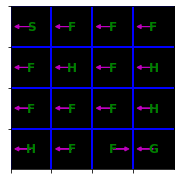

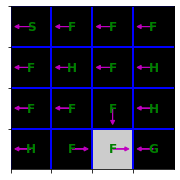

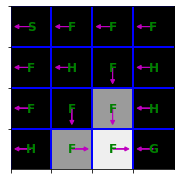

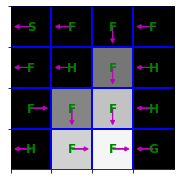

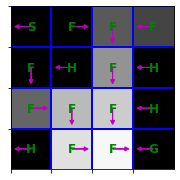

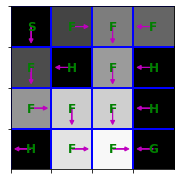

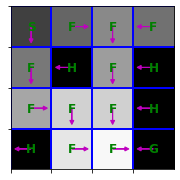

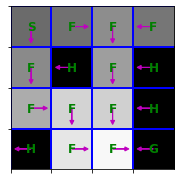

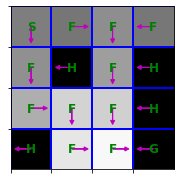

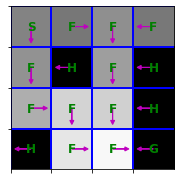

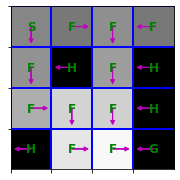

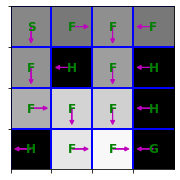

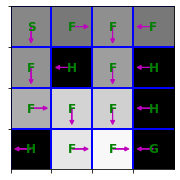

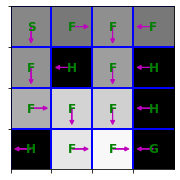

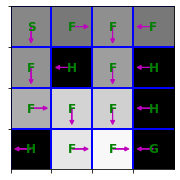

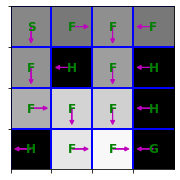

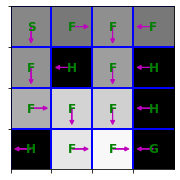

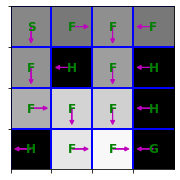

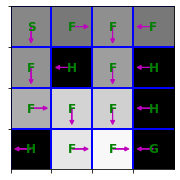

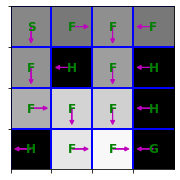

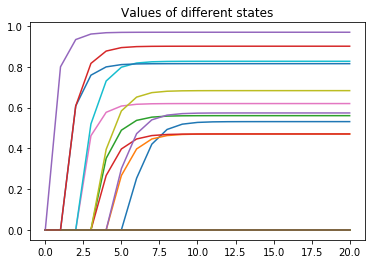

In [6]:
for (V, pi) in zip(Vs, pis):
    plt.figure(figsize=(3,3))
    plt.imshow(V.reshape(4,4), cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(4)-.5)
    ax.set_yticks(np.arange(4)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {0: (-1, 0), 1:(0, -1), 2:(1,0), 3:(-1, 0)}
    Pi = pi.reshape(4,4)
    for y in range(4):
        for x in range(4):
            a = Pi[y, x]
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
            plt.text(x, y, str(agentDP.MDP.unwrapped.desc[y,x].item().decode()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
    plt.grid(color='b', lw=2, ls='-')
plt.figure()
plt.plot(Vs)
plt.title("Values of different states");